# Climate Coding Challenge

Climate change is impacting the way people live around the world

# So, is the climate changing?

## STEP 0: Set up

To get started on this notebook, you’ll need to restore any variables
from previous notebooks to your workspace. To save time and memory, make
sure to specify which variables you want to load.

In [1]:
# Restore Variables
%store -r ann_climate_df cc_boulder_plot project

## STEP 1: Quantify how fast the climate is changing with a trend line

Global climate change causes different effects in different places when
we zoom in to a local area. However, you probably noticed when you
looked at mean annual temperatures over time that they were rising. We
can use a technique called **Linear Ordinary Least Squares (OLS)
Regression** to determine how quickly temperatures are rising on
average.

Before we get started, it’s important to consider that OLS regression is
not always the right technique, because it makes some important
assumptions about our data:

Random error  
Variation in temperature can be caused by many things beyond global
climate change. For example, temperatures often vary with patterns of
ocean surface temperatures (*teleconnections*), the most famous of which
are El Niño and La Niña. By using a linear OLS regression, we’re
assuming that all the variation in temperature except for climate change
is random.

Normally distributed error  
If you have taken a statistics class, you probably learned a lot about
the normal, or Gaussian distribution. For right now, what you need to
know is that OLS regression is useful for identifying trends in average
temperature, but wouldn’t be appropriate for looking at trends in daily
precipitation (because most days have zero precipitation), or at maximum
or minimum annual temperatures (because these are extreme values, and
the normal distribution tends to underestimate the likelihood of large
events).

Linearity  
We’re assuming that temperatures are increasing or decreasing at a
constant rate over time. We wouldn’t be able to look at rates that
change over time. For example, many locations in the Arctic remained the
same temperature for much longer than the rest of the world, because ice
melt was absorbing all the extra heat. Linear OLS regression wouldn’t be
able to identify when the temperature rise began on its own.

Stationarity  
We’re assuming that variation in temperature caused by things *other*
than global climate change (e.g. the random error) behaves the same over
time. For example, the linear OLS regression can’t take increased
variability from year to year into account, which is a common effect of
climate change. We often see “global weirding”, or more extreme head
*and* cold, in addition to overall increases. You can observe this most
easily by looking at your daily data again. Does it seem to be fanning
in or out over time?

It’s pretty rare to encounter a perfect statistical model where all the
assumptions are met, but you want to be on the lookout for serious
discrepancies, especially when making predictions. For example,
[ignoring assumptions about Gaussian error arguably led to the 2008
financial crash](https://www.wired.com/2009/02/wp-quant/).

<link rel="stylesheet" type="text/css" href="./assets/styles.css"><div class="callout callout-style-default callout-titled callout-respond"><div class="callout-header"><div class="callout-icon-container"><i class="callout-icon"></i></div><div class="callout-title-container flex-fill">Reflect and Respond: Is linear OLS regression right for your data?</div></div><div class="callout-body-container callout-body"><p>Take a look at your data. In the cell below, write a few sentences
about ways your data does and does not meet the linear OLS regression
assumptions.</p></div></div>

### Answer
Using annualized data in this context works well for an OLS regression because it smooths out a lot of the seasonality and non-normal distribution of error in our original daily data, but there are still a few issues. Some of the variation in annual temperature is due to the cyclical nature of various forces like orbit periodicity and the mentioned teleconnections which lead to non-random error distributions. It is also unlikely that temperature itself and the variation year over year are changing at a constant rate which would violate linearity and stationarity. 

<link rel="stylesheet" type="text/css" href="./assets/styles.css"><div class="callout callout-style-default callout-titled callout-task"><div class="callout-header"><div class="callout-icon-container"><i class="callout-icon"></i></div><div class="callout-title-container flex-fill">Try It: Import Packages</div></div><div class="callout-body-container callout-body"><p>The following cell contains package imports that you will need to
calculate and plot an OLS Linear trend line. Make sure to run the cell
before moving on, and if you have any additional packages you would like
to use, add them here later on.</p></div></div>

In [2]:
# Import libraries
import earthpy
import holoviews as hv
import hvplot.pandas
import pandas as pd
import numpy as np

# Advanced options on matplotlib/seaborn/pandas plots
import matplotlib.pyplot as plt
# Common statistical plots for tabular data
import seaborn as sns
# Fit an OLS linear regression
from sklearn.linear_model import LinearRegression

<link rel="stylesheet" type="text/css" href="./assets/styles.css"><div class="callout callout-style-default callout-titled callout-task"><div class="callout-header"><div class="callout-icon-container"><i class="callout-icon"></i></div><div class="callout-title-container flex-fill">Try It: Regression</div></div><div class="callout-body-container callout-body"><ol type="1">
<li>To get sample code, ask ChatGPT how to fit a linear model to your
data. If you’re new to using large language models, go ahead and check
out <a
href="https://chatgpt.com/share/649b897b-9075-457e-8e12-308f795312a1">our
query</a></li>
<li>Copy code that uses the <code>scikit-learn</code> package to perform
a OLS linear regression to the code cell below.</li>
<li>Check out your previous plot. Does it make sense to include all the
data when calculating a trend line? Be sure to select out data that
meets the OLS assumptions.</li>
</ol></div></div>

> **Note**
>
> We know that some computers, networks, and countries block LLM (large
> language model) sites, and that LLMs can sometimes perpetuate
> oppressive or offensive language and ideas. However, LLMs are
> increasingly standard tools for programming – [according to
> GitHub](https://github.com/features/copilot) many developers code 55%
> faster with LLM assistance. We also see in our classes that LLMs give
> students the ability to work on complex real-world problems earlier
> on. We feel it’s worth the trade-off, and at this point we would be
> doing you a disservice professionally to teach you to code without
> LLMs. If you can’t access them, don’t worry – we’ll present a variety
> of options for finding example code. For example, you can also search
> for an example on a site like
> [StackOverflow](https://stackoverflow.com/) (this is how we all
> learned to code, and with the right question it’s a fantastic resource
> for any coder to get access to up-to-date information from world
> experts quickly). You can also use our solutions as a starting point.

In [3]:
# Fit an OLS Linear Regression to the data

# Drop years missing data from analysis
complete_data_df = ann_climate_df.dropna()

# Define variables
x = complete_data_df.index.year.values.reshape(-1, 1)
y = complete_data_df['Temp_celsius']

# Create and fit the linear regression model
model = LinearRegression()
model.fit(x, y)

# Calculate and print slope
print(f'Slope: {model.coef_[0]} degrees per year')

Slope: 0.018095139055852496 degrees per year


## STEP 2: Plot your trend line

Trend lines are often used to help your audience understand and process
a time-series plot. In this case, we’ve chosed mean temperature values
rather than extremes, so we think OLS is an appropriate model to use to
show a trend.

> **Is it ok to plot a trend line even if OLS isn’t an appropriate
> model?**
>
> This is a tricky issue. When it comes to a trend line, choosing a
> model that is technically more appropriate may require much more
> complex code without resulting in a noticeably different trend line.
>
> We think an OLS trend line is an ok visual tool to indicate the
> approximate direction and size of a trend. If you are showing standard
> error, making predictions or inferences based on your model, or
> calculating probabilities (p-values) based on your model, or making
> statements about the statistical significance of a trend, we’d suggest
> reconsidering your choice of model.

<link rel="stylesheet" type="text/css" href="./assets/styles.css"><div class="callout callout-style-default callout-titled callout-task"><div class="callout-header"><div class="callout-icon-container"><i class="callout-icon"></i></div><div class="callout-title-container flex-fill">Try It: Regression Plot</div></div><div class="callout-body-container callout-body"><ol type="1">
<li>Add values for x (year) and y (temperature) to plot a regression
plot. You will have to select out the year from the index values, just
like you probably did when fitting your linear model above!</li>
<li>Label the axes of your plot with the <code>title</code>,
<code>xlabel</code>, and <code>ylabel</code> parameters. We’ve gotten
you started with an example that shows how to put in the degree symbol.
Make sure your labels match what you’re plotting!</li>
<li>Can you figure out how to customize the colors and line style on
your plot? Check out the <a
href="https://seaborn.pydata.org"><code>seaborn</code> documentation</a>
for ideas.</li>
</ol></div></div>

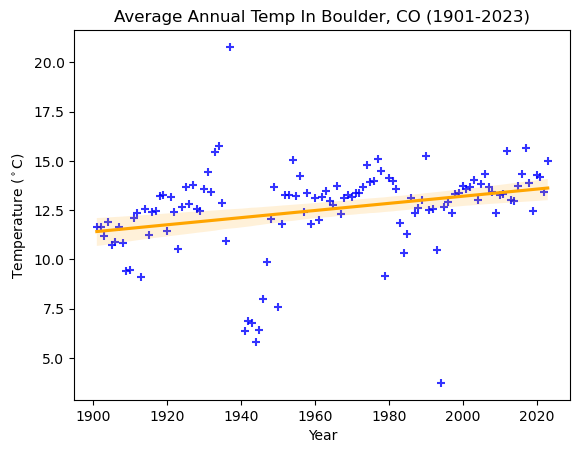

OLS Regression Slope: 0.018095139055852496 degrees increase per year


In [4]:
# Plot annual average temperature with a trend line
ax = sns.regplot(
    x = complete_data_df.index.year, 
    y = complete_data_df.Temp_celsius,
    color = 'blue',
    line_kws = {'color' : 'orange'},
    marker="+",
    label = 'test'
)

# Set plot labels
ax.set(
    title='Average Annual Temp In Boulder, CO (1901-2023)',
    xlabel='Year',
    ylabel='Temperature ($^\circ$C)',
    label = 'test'
)

# Save plot
plt.savefig('/workspaces/02-climate-cmcara/media/cc_boulder_climate_reg.jpeg')

# Display the plot without extra text
plt.show()

# Display Slope as well
print(f'OLS Regression Slope: {model.coef_[0]} degrees increase per year')

<link rel="stylesheet" type="text/css" href="./assets/styles.css"><div class="callout callout-style-default callout-titled callout-respond"><div class="callout-header"><div class="callout-icon-container"><i class="callout-icon"></i></div><div class="callout-title-container flex-fill">Reflect and Respond: Interpret the trend</div></div><div class="callout-body-container callout-body"><ol type="1">
<li>Create a new Markdown cell below this one.</li>
<li>Write a plot headline. Your headline should
<strong>interpret</strong> your plot, unlike a caption which neutrally
describes the image.</li>
<li>Is the climate changing? How much? Report the slope of your trend
line.</li>
</ol></div></div>

## On current pace, Boulder average annual temperatures increase by one degree Celsius every 55 years.
### (according to this data set)
There is a positively slopped trend line showing a 0.018095 degree increase each year on average, but we could improve accuracy and confidence by controlling for other factors, increasing sample size by adding in more stations, or various other methods. This seems to be within the range of global estimates for temperature increase I could find online but further refinement would help determine whether Boulder is above or below the global average for example. 